In [103]:
from shapely.geometry import shape
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import geopandas as gpd
import json


sns.set(style="whitegrid")

In [69]:
df_all = pd.read_csv('../resources/data/generated/buildings_all_features.csv')
df_graffiti = df_all[df_all['graffiti_count'] > 0]

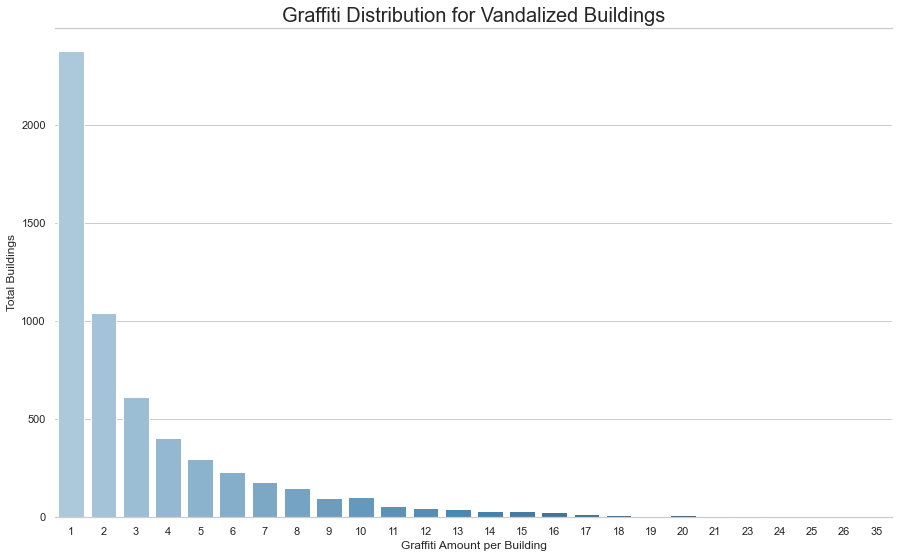

In [75]:
plt.rcParams["figure.figsize"] = (15,9)
df = df_graffiti.groupby('graffiti_count').size().reset_index(name='Total Buildings').sort_values('graffiti_count')
df['graffiti_count'] = df['graffiti_count'].astype(int)
sns.barplot(x="graffiti_count", y="Total Buildings", data=df, palette="Blues_d")
sns.despine(left=True, top=False)
plt.xlabel('Graffiti Amount per Building')
plt.title('Graffiti Distribution for Vandalized Buildings', fontdict = {'fontsize' : 20})
plt.show()

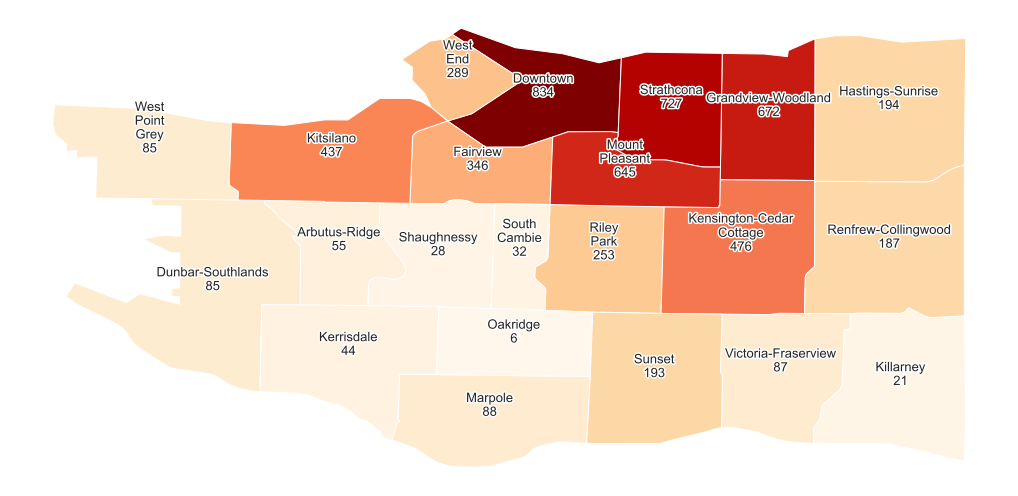

In [138]:
df_local_areas = gpd.read_file('../resources/data/generated/geo_local_area_details.csv')
df_local_areas['geometry'] = [shape(json.loads(x)) for x in df_local_areas['Geom']]
df = df_graffiti.groupby('geo_local_area').size().reset_index(name='count')
df = df_local_areas.merge(df, on='geo_local_area')

plt.rcParams["figure.figsize"] = (18,9)
ax = df.plot(column='count', cmap='OrRd')
ax.set_axis_off();
newline = "\n"
df.apply(
    lambda x: ax.annotate(
        text=f'{x["geo_local_area"].replace(" ", newline)}\n{x["count"]}',
        xy=x.geometry.centroid.coords[0],
        ha='center',
        fontsize=13,
        path_effects=[pe.withStroke(linewidth=3, foreground="white")]
    ),
    axis=1
)
plt.show()